In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import scale, normalize, minmax_scale
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate
from sklearn.linear_model import Ridge, Lasso

In [2]:
mydata = pd.read_csv(file_path)
mydata.head(3)

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33


In [3]:
mydata.shape

(3479, 8)

In [4]:
mydata.dtypes

Area           object
Room            int64
Parking          bool
Warehouse        bool
Elevator         bool
Address        object
Price         float64
Price(USD)    float64
dtype: object

In [5]:
mydata.Area = pd.to_numeric(mydata.Area, errors = 'coerce')
mydata.dtypes

Area          float64
Room            int64
Parking          bool
Warehouse        bool
Elevator         bool
Address        object
Price         float64
Price(USD)    float64
dtype: object

In [6]:
mydata.isnull().sum()

Area           6
Room           0
Parking        0
Warehouse      0
Elevator       0
Address       23
Price          0
Price(USD)     0
dtype: int64

In [7]:
mydata.drop(index = mydata.Address[mydata.Address.isnull()].index, inplace = True)
mydata.drop(index = mydata.Area[mydata.Area.isnull()].index, inplace = True)
mydata_new = mydata.copy()
mydata.shape

(3450, 8)

In [8]:
mydata_new.head(3)

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63.0,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60.0,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79.0,2,True,True,True,Pardis,5.500000e+08,18333.33


In [9]:
mydata.replace({False: 0, True: 1}, inplace = True)
address = set(mydata.Address)
Address = {}
for i, j in enumerate(address, start = 1):
    x = {j: i}
    Address.update(x)

number_address = mydata.Address.map(lambda s: Address.get(s) if s in Address else s)
number_address

0       145
1       145
2         4
3        15
4        18
       ... 
3474    182
3475     49
3476    132
3477     52
3478    132
Name: Address, Length: 3450, dtype: int64

In [10]:
address =  set(mydata.Address)
Address = {}
for i in address:
    j = mydata[mydata.Address == i].Price.sum() / mydata[mydata.Address == i].Area.sum()
    Address[i] = j

ave_price = mydata.Address.map(lambda s: Address[s] if s in Address else s)
ave_price

0       3.654189e+07
1       3.654189e+07
2       8.014821e+06
3       9.989330e+06
4       8.590476e+07
            ...     
3474    3.921412e+07
3475    1.108802e+08
3476    6.435927e+06
3477    9.718675e+07
3478    6.435927e+06
Name: Address, Length: 3450, dtype: float64

In [11]:
#Droping usless data
mydata.drop(mydata[(mydata.Area > 500.0) & (mydata.Room < 4)].index, axis = 0, inplace = True)
mydata

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63.0,1,1,1,1,Shahran,1.850000e+09,61666.67
1,60.0,1,1,1,1,Shahran,1.850000e+09,61666.67
2,79.0,2,1,1,1,Pardis,5.500000e+08,18333.33
3,95.0,2,1,1,1,Shahrake Qods,9.025000e+08,30083.33
4,123.0,2,1,1,1,Shahrake Gharb,7.000000e+09,233333.33
...,...,...,...,...,...,...,...,...
3474,86.0,2,1,1,1,Southern Janatabad,3.500000e+09,116666.67
3475,83.0,2,1,1,1,Niavaran,6.800000e+09,226666.67
3476,75.0,2,0,0,0,Parand,3.650000e+08,12166.67
3477,105.0,2,1,1,1,Dorous,5.600000e+09,186666.67


In [12]:
y = np.asarray(mydata.Price)
for i in mydata.columns[6:]:
    mydata.drop(i, axis = 1, inplace = True)

mydata

,Area,Room,Parking,Warehouse,Elevator,Address
0,63.0,1,1,1,1,Shahran
1,60.0,1,1,1,1,Shahran
2,79.0,2,1,1,1,Pardis
3,95.0,2,1,1,1,Shahrake Qods
4,123.0,2,1,1,1,Shahrake Gharb
...,...,...,...,...,...,...
3474,86.0,2,1,1,1,Southern Janatabad
3475,83.0,2,1,1,1,Niavaran
3476,75.0,2,0,0,0,Parand
3477,105.0,2,1,1,1,Dorous


In [13]:
#Adding average price to the data frame
mydata['Ave Price'] = ave_price
mydata.Address = number_address
mydata

,Area,Room,Parking,Warehouse,Elevator,Address,Ave Price
0,63.0,1,1,1,1,145,3.654189e+07
1,60.0,1,1,1,1,145,3.654189e+07
2,79.0,2,1,1,1,4,8.014821e+06
3,95.0,2,1,1,1,15,9.989330e+06
4,123.0,2,1,1,1,18,8.590476e+07
...,...,...,...,...,...,...,...
3474,86.0,2,1,1,1,182,3.921412e+07
3475,83.0,2,1,1,1,49,1.108802e+08
3476,75.0,2,0,0,0,132,6.435927e+06
3477,105.0,2,1,1,1,52,9.718675e+07


In [14]:
#due to wide range of the numbers we have to scale the data
x = np.asarray(mydata)
x = scale(x)
x

array([[-0.67636282, -1.42280209,  0.4238356 , ...,  0.51711054,
         0.85310795, -0.22944077],
       [-0.72422176, -1.42280209,  0.4238356 , ...,  0.51711054,
         0.85310795, -0.22944077],
       [-0.42111512, -0.10635627,  0.4238356 , ...,  0.51711054,
        -1.60557422, -1.23429199],
       ...,
       [-0.48492704, -0.10635627, -2.35940541, ..., -1.93382249,
         0.62642094, -1.2899077 ],
       [-0.00633761, -0.10635627,  0.4238356 , ...,  0.51711054,
        -0.76857603,  1.90674258],
       [-0.37325618, -0.10635627, -2.35940541, ...,  0.51711054,
         0.62642094, -1.2899077 ]])

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 30)

In [16]:
reg = LinearRegression()
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error for Linear Regression: ', mse)

Mean Squared Error for Linear Regression:  1.6831601531360983e+19


In [17]:
reg_score = reg.score(x_train, y_train)
print('Regression Train Score: %f' %reg_score)
reg_score = reg.score(x_test, y_test)
print('Regression Test Score: %f' %reg_score)

Regression Train Score: 0.746687
Regression Test Score: 0.761992


In [18]:
cv_results = cross_validate(reg, x, y, cv = 10, return_train_score = True)
cv_results['test_score'].mean()

0.7217841525909163

In [19]:
cv_results['train_score'].mean()

0.7505154742148488

In [20]:
#To find important features we use Ridge and Lasso and compare the score
ridge = Ridge(alpha = 0.1)
ridge.fit(x_train, y_train)
y_pred_ridge = ridge.predict(x_test)
mse_ridge = mean_squared_error(y_test, y_pred)
print('Mean squared Error for Ridge: ', mse_ridge)

Mean squared Error for Ridge:  1.6831601531360983e+19


In [21]:
ridge_score = ridge.score(x_test, y_test)
ridge_score

0.7619891088851181

In [22]:
ridge_score = ridge.score(x_train, y_train)
ridge_score

0.7466874821160026

In [23]:
cv_results = cross_validate(ridge, x, y, cv = 10, return_train_score = True)
cv_results['test_score'].mean()

0.721787246090057

In [24]:
cv_results['train_score'].mean()

0.75051547297416

In [25]:
lasso = Lasso(alpha = 0.1)
lasso.fit(x_train, y_train)
y_pred_lasso = lasso.predict(x_test)
mse_lasso = mean_squared_error(y_test, y_pred)
print('Mean squared Error for Lasso: ', mse_lasso)

Mean squared Error for Lasso:  1.6831601531360983e+19


In [26]:
lasso_score = lasso.score(x_test, y_test)
lasso_score

0.7619919373945665

In [27]:
lasso_score = lasso.score(x_train, y_train)
lasso_score

0.74668748367081

In [28]:
cv_results = cross_validate(lasso, x, y, cv = 10, return_train_score = True)
cv_results['test_score'].mean()

0.7217841525946926

In [29]:
cv_results['train_score'].mean()

0.7505154742148488

In [30]:
mydata.columns

Index(['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'Address',
       'Ave Price'],
      dtype='object')

In [31]:
print(lasso.coef_)
print(ridge.coef_)

[ 5.16919497e+09 -4.02216171e+08 -4.52821959e+08  3.10413376e+07
 -5.06723881e+07  1.41896577e+08  3.37264997e+09]
[ 5.16875730e+09 -4.01855468e+08 -4.52766473e+08  3.10325102e+07
 -5.07017491e+07  1.41883759e+08  3.37256978e+09]


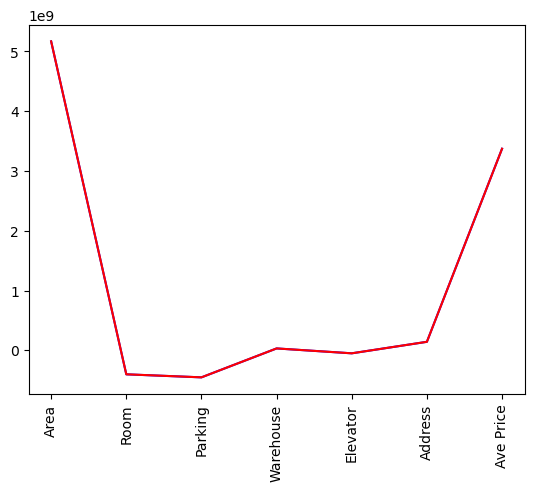

In [32]:
plt.plot(range(7), lasso.coef_, color = 'blue')
plt.plot(range(7), ridge.coef_, '-r')
plt.xticks(range(7), mydata.columns[:], rotation = 90)
plt.show()

In [33]:
from sklearn.preprocessing import PolynomialFeatures

In [34]:
print(mydata_new['Area'].describe())
print(mydata_new[mydata_new['Area'] > 1e6])

count    3450.000000
mean      106.917391
std        69.550976
min        30.000000
25%        69.000000
50%        90.000000
75%       120.000000
max       929.000000
Name: Area, dtype: float64
Empty DataFrame
Columns: [Area, Room, Parking, Warehouse, Elevator, Address, Price, Price(USD)]
Index: []


In [35]:
#This code performs outlier removal from the DataFrame using the Interquartile Range
#method for two columns: 'Area' and 'PriceUSD'

Q1_area = mydata_new.Area.quantile(0.25)
Q3_area = mydata_new.Area.quantile(0.75)
IQR_area = Q3_area - Q1_area

Q1_price = mydata_new['Price(USD)'].quantile(0.25)
Q3_price = mydata_new['Price(USD)'].quantile(0.75)
IQR_price = Q3_price - Q1_price

lower_bound_area = Q1_area - 1.5 * IQR_area
upper_bound_area = Q3_area + 1.5 * IQR_area

lower_bound_price = Q1_price - 1.5 * IQR_price
upper_bound_price = Q3_price + 1.5 * IQR_price

df_cleaned = mydata_new[(mydata_new.Area >= lower_bound_area) & (mydata_new['Area'] <= upper_bound_area) &
                (mydata_new['Price(USD)'] >= lower_bound_price) & (mydata_new['Price(USD)'] <= upper_bound_price)]
df_cleaned.describe()

,Area,Room,Price,Price(USD)
count,3089.000000,3089.000000,3.089000e+03,3089.000000
mean,90.390741,1.948851,3.402622e+09,113420.718776
std,30.842810,0.639259,2.849557e+09,94985.227361
min,30.000000,0.000000,3.600000e+06,120.000000
25%,66.000000,2.000000,1.250000e+09,41666.670000
50%,86.000000,2.000000,2.460000e+09,82000.000000
75%,109.000000,2.000000,4.520000e+09,150666.670000
max,192.000000,5.000000,1.282500e+10,427500.000000


In [36]:
df_cleaned.columns

Index(['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'Address', 'Price',
       'Price(USD)'],
      dtype='object')

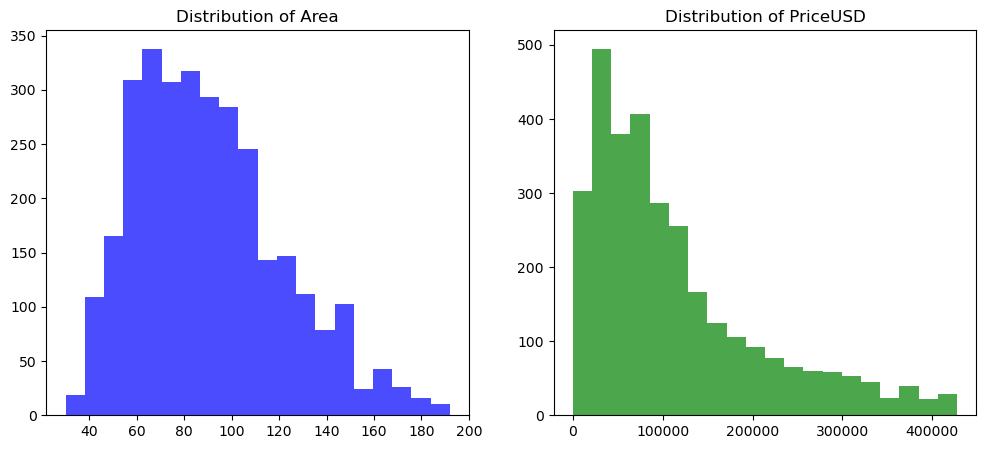

In [37]:
plt.figure(figsize = (12, 5))

plt.subplot(1,2,1)
plt.hist(df_cleaned.Area, bins = 20, color = 'blue', alpha = 0.7)
plt.title('Distribution of Area')

plt.subplot(1,2,2)
plt.hist(df_cleaned['Price(USD)'], bins = 20, color = 'green', alpha = 0.7)
plt.title('Distribution of PriceUSD')

plt.show()

In [38]:
#Root Mean Squared Error
def compute_rms_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [39]:
#Function to creat polynomial features
def polynomial_features(X, degree):
    poly = PolynomialFeatures(degree = degree)
    return poly.fit_transform(X)

In [40]:
#Function to perform polynomial regression
def polynomial_regression(X, y, degree):
    poly = PolynomialFeatures(degree = degree)
    X_poly = poly.fit_transform(X)
    model = LinearRegression()
    model.fit(X_poly, y)
    return model

Processing address: Shahran


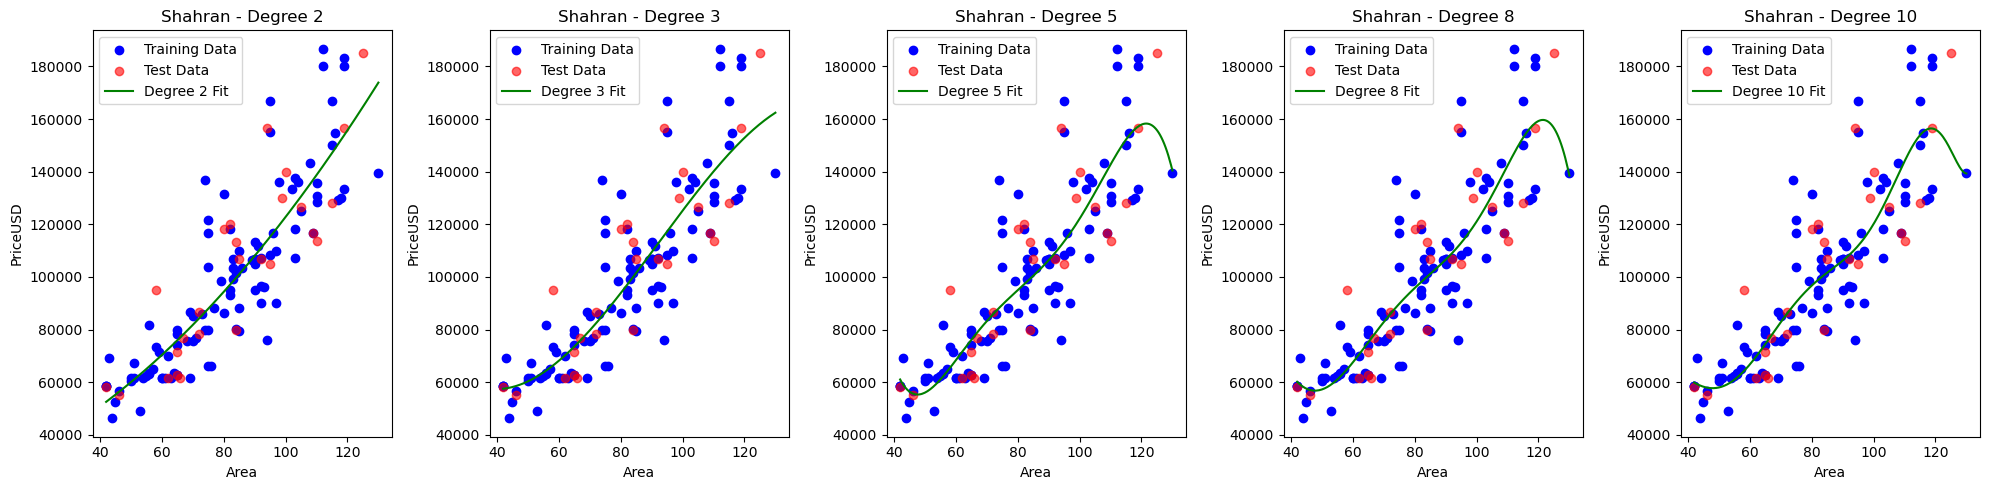

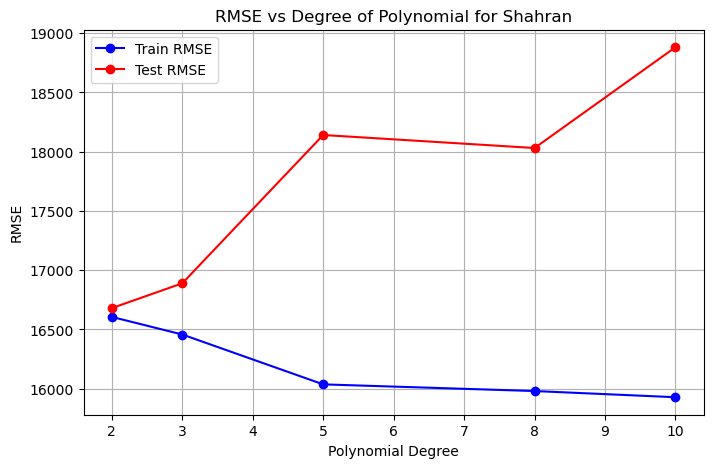

Processing address: Pardis


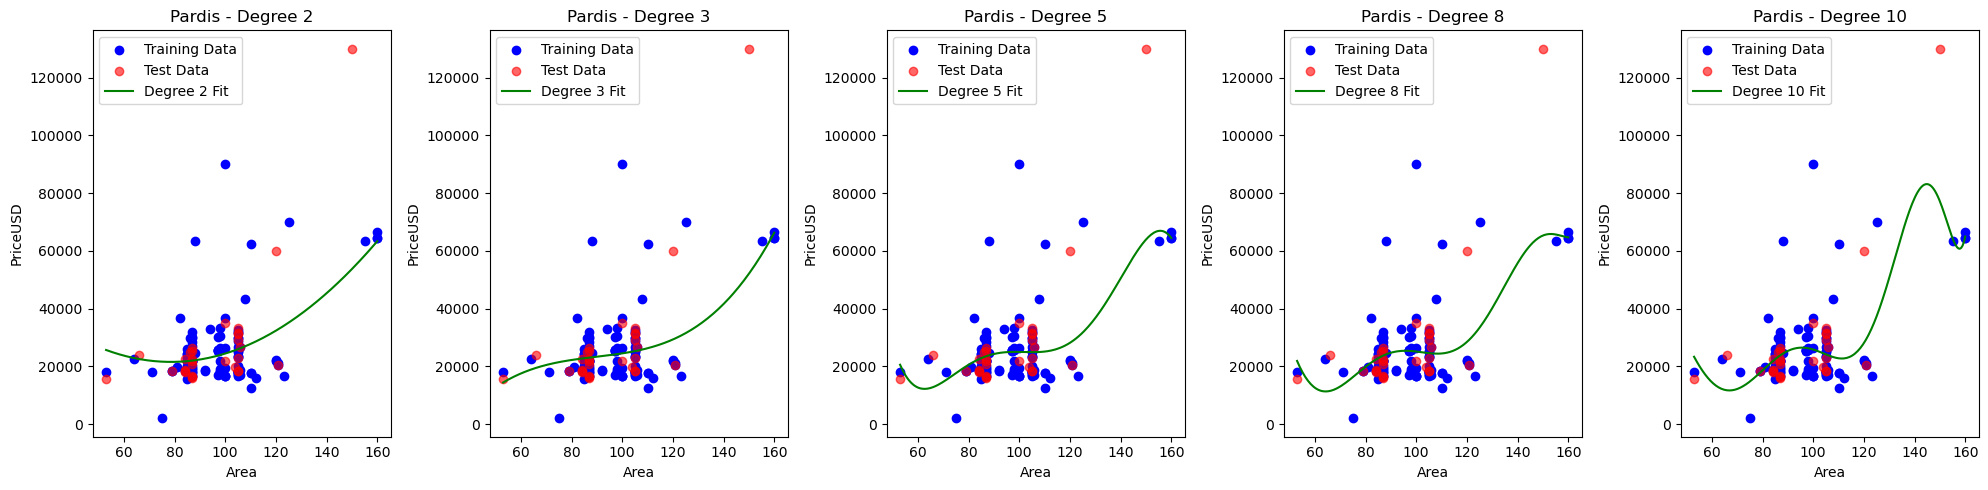

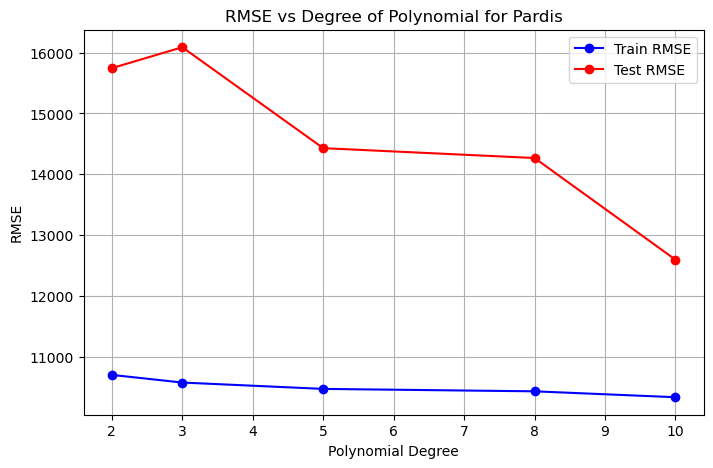

Processing address: West Ferdows Boulevard


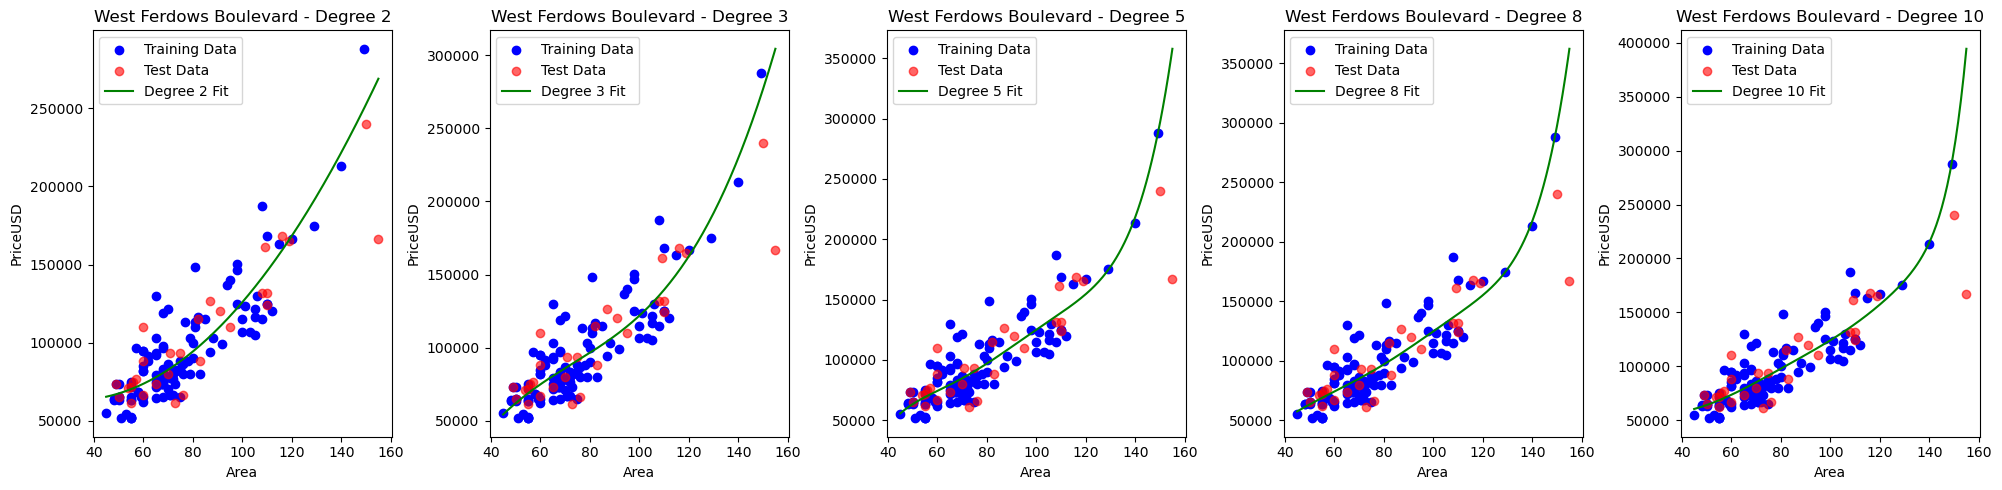

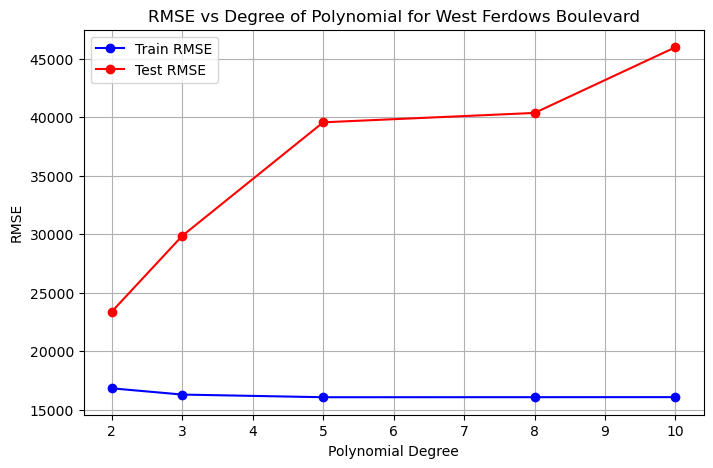

Processing address: Parand


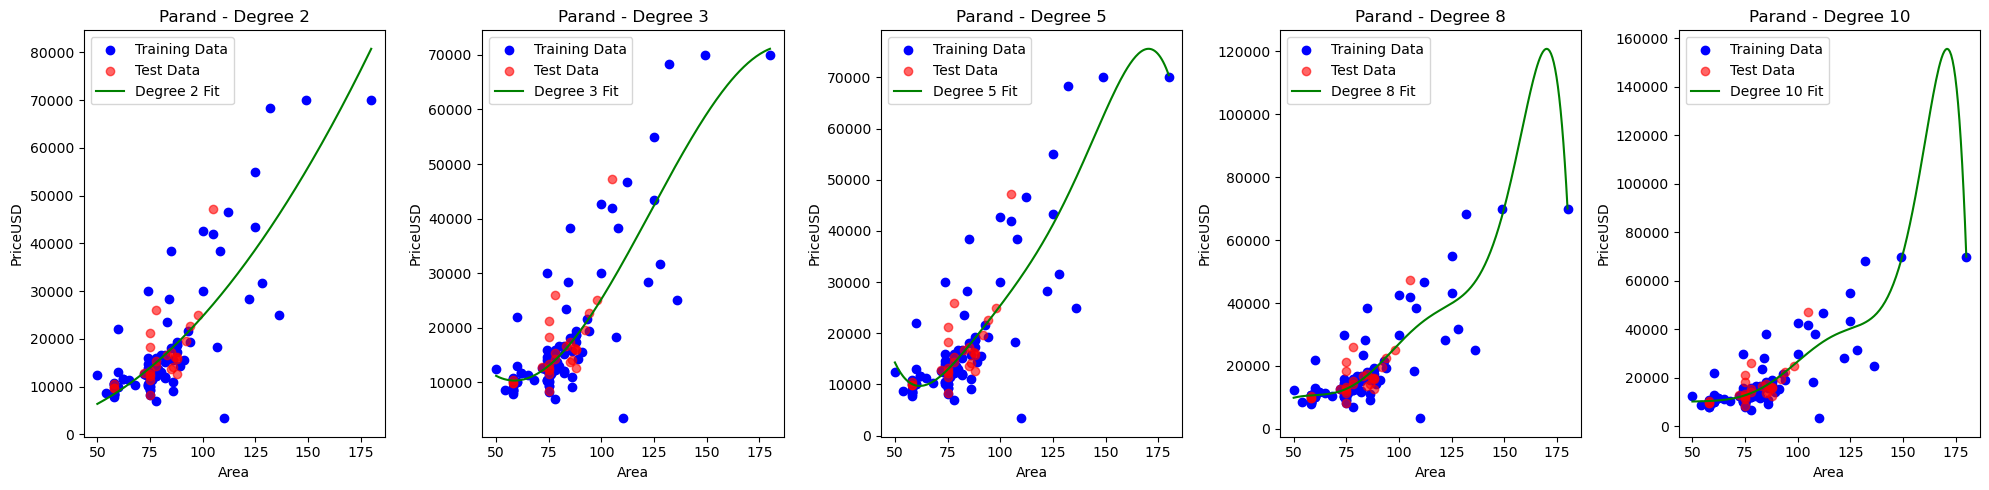

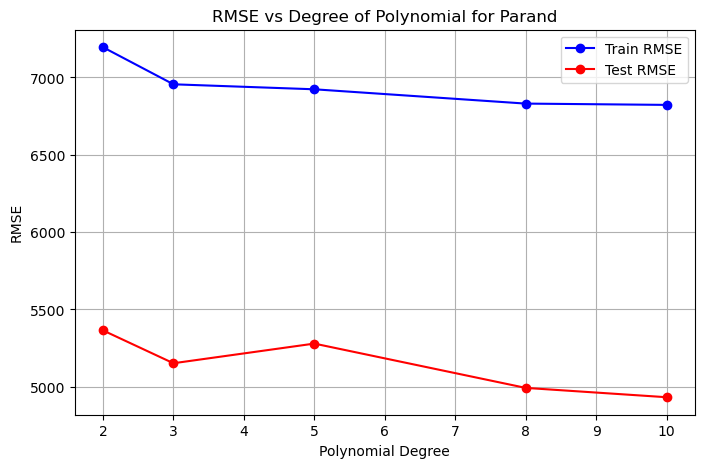

Processing address: Punak


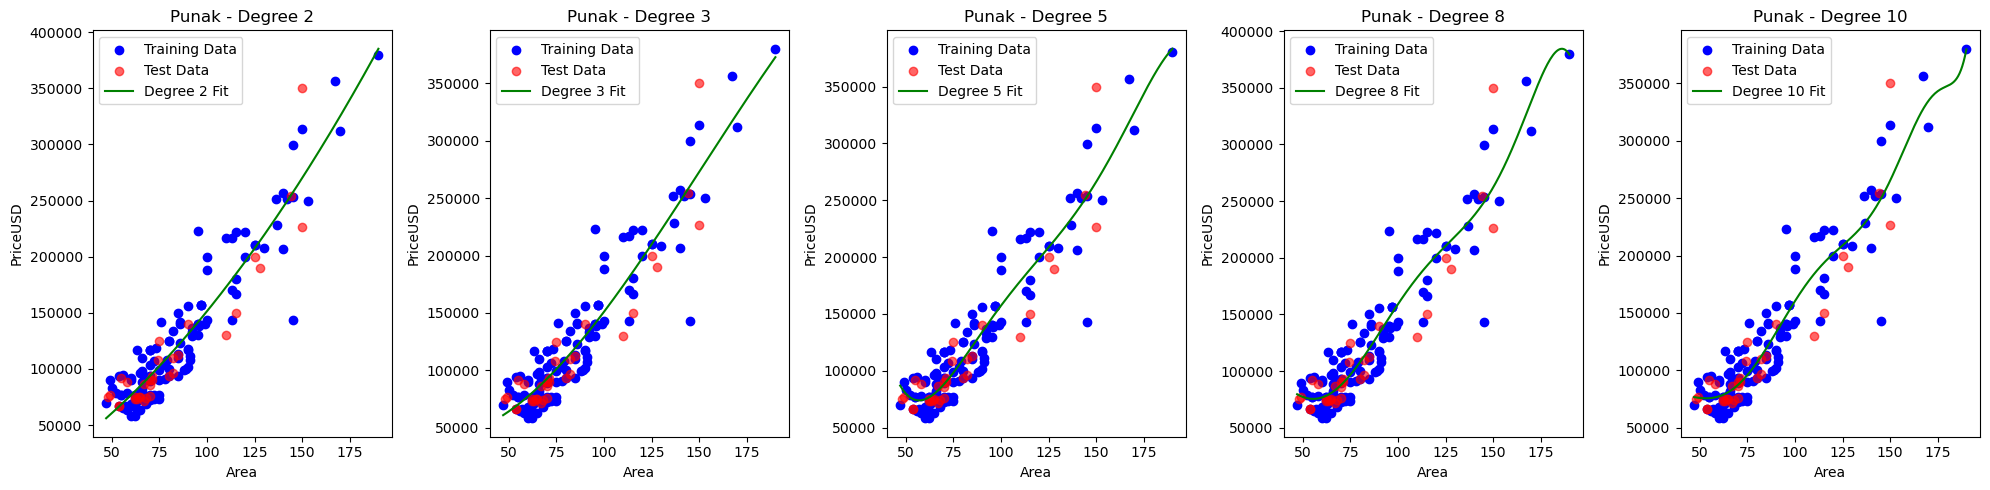

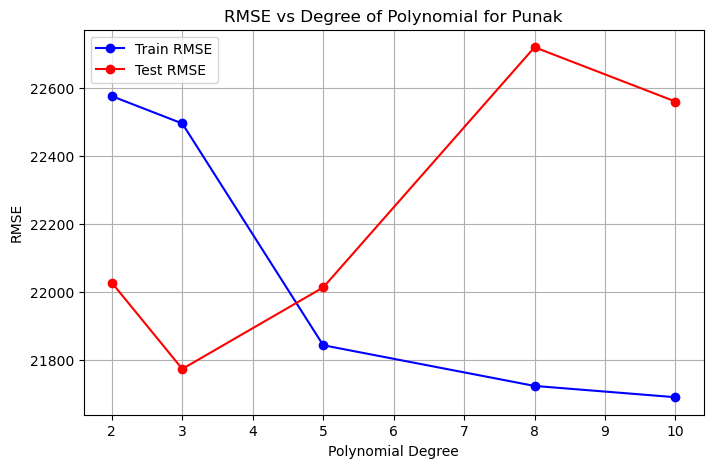

Skipping address Pakdasht KhatunAbad due to insufficient samples.
Skipping address Chahardangeh due to insufficient samples.
Skipping address Baqershahr due to insufficient samples.
Skipping address Bahar due to insufficient samples.
Skipping address Chardivari due to insufficient samples.
Skipping address Sohanak due to insufficient samples.
Skipping address Zibadasht due to insufficient samples.
Skipping address Chardangeh due to insufficient samples.
Skipping address Villa due to insufficient samples.
Skipping address Azari due to insufficient samples.
Skipping address Shahrake Apadana due to insufficient samples.
Skipping address Darband due to insufficient samples.
Skipping address Eram due to insufficient samples.
Skipping address SabaShahr due to insufficient samples.
Skipping address Shahrake Madaen due to insufficient samples.
Skipping address Salehabad due to insufficient samples.
Skipping address Enghelab due to insufficient samples.
Skipping address Islamshahr Elahieh due t

In [41]:
# Group by 'Address' and perform analysis for each region
addresses = df_cleaned['Address'].unique()

for address in addresses:
    df_address = df_cleaned[df_cleaned['Address'] == address]

    # Skip if not enough data points
    if len(df_address) < 2:
        print(f"Skipping address {address} due to insufficient samples.")
        continue

    X = df_address[['Area']]
    y = df_address['Price(USD)']

    # Perform train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Skip if train or test sets are empty
    if len(X_train) < 50 or len(X_test) < 25:
        # print(f"Skipping address {address} due to train-test split issues.")
        continue
    else:
      print(f"Processing address: {address}")

    # Set polynomial degrees to evaluate
    degrees = [2, 3, 5, 8, 10]

    train_rms_errors = []
    test_rms_errors = []

    for degree in degrees:
        model = polynomial_regression(X_train, y_train, degree)

        X_train_poly = polynomial_features(X_train, degree)
        y_train_pred = model.predict(X_train_poly)

        X_test_poly = polynomial_features(X_test, degree)
        y_test_pred = model.predict(X_test_poly)

        train_rms_error = compute_rms_error(y_train, y_train_pred)
        test_rms_error = compute_rms_error(y_test, y_test_pred)

        train_rms_errors.append(train_rms_error)
        test_rms_errors.append(test_rms_error)

        # print(f"Address: {address}, Degree {degree}: Train RMSE = {train_rms_error:.2f}, Test RMSE = {test_rms_error:.2f}")

        # Visualize Polynomial Regression for each degree
    fig, axs = plt.subplots(1, len(degrees), figsize=(20, 5))  # Create a grid for subplots

    for idx, degree in enumerate(degrees):
        model = polynomial_regression(X_train, y_train, degree)

        X_train_poly = polynomial_features(X_train, degree)
        y_train_pred = model.predict(X_train_poly)

        X_test_poly = polynomial_features(X_test, degree)
        y_test_pred = model.predict(X_test_poly)

        # Scatter plot of actual data and polynomial fit
        axs[idx].scatter(X_train, y_train, color='blue', label="Training Data")
        axs[idx].scatter(X_test, y_test, color='red', label="Test Data", alpha=0.6)
        X_fit = np.linspace(X.min(), X.max(), 200).reshape(-1, 1)
        X_fit_poly = polynomial_features(X_fit, degree)
        y_fit_pred = model.predict(X_fit_poly)
        axs[idx].plot(X_fit, y_fit_pred, label=f"Degree {degree} Fit", color='green')
        axs[idx].set_title(f"{address} - Degree {degree}")
        axs[idx].set_xlabel("Area")
        axs[idx].set_ylabel("PriceUSD")
        axs[idx].legend()

    plt.tight_layout()
    plt.show()


    # Plot Train RMSE and Test RMSE vs Polynomial Degree for each address
    plt.figure(figsize=(8, 5))
    plt.plot(degrees, train_rms_errors, marker='o', label='Train RMSE', color='blue')
    plt.plot(degrees, test_rms_errors, marker='o', label='Test RMSE', color='red')
    plt.title(f"RMSE vs Degree of Polynomial for {address}")
    plt.xlabel("Polynomial Degree")
    plt.ylabel("RMSE")
    plt.legend()
    plt.grid(True)
    plt.show()